# Introducation to Text Data 
# Natural Language Precessing (NLP)

* Reference: https://towardsdatascience.com/natural-language-processing-workflow-1dddf3a48ab5

* Natural Language Processing (NLP) is the study of how computers interact (i.e. understand, interpret, manipulate) with humans through language, (e.g. speech, text). NLP got its start from the field of Linguistics, the study of language, primarily focusing on its semantics, phonetics, and grammar. Before machine learning began to show success with NLP tasks, it was mainly programming algorithms with rule-based methods from linguistics. The machine learning methods provided better accuracy, faster processing times, and dependability, resulting in the rule-based approaches taking the back seat.

# The Major NLP libraries are:
     1. Scikit-Learn Documentation
     2. NLTK (Natural Language Toolkit)
# NLP workflow
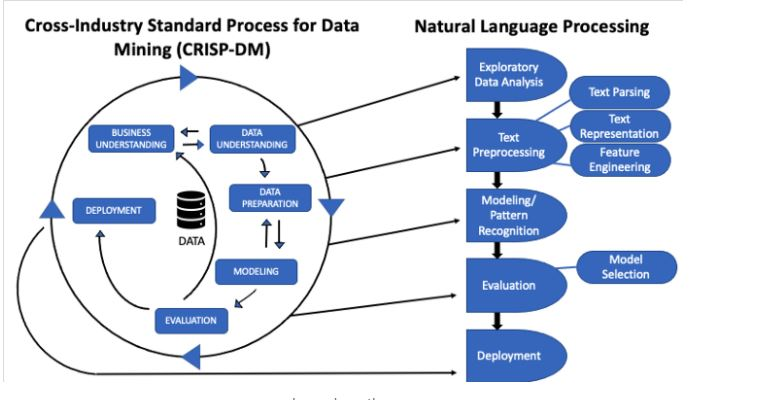

# Vectorization 

* When working with text data, one of the first steps is to vectorize the text to create a Bag of Words (BoW). This bag will hold information about the individual words, e.g., a count of how many times each word appears in a corpus. The words in the bag are not in any specific order and if we have a large enough corpus, we may begin to notice patterns.
* Before creating a BoW, the text data needs to be cleaned and tokenized. This will prevent the words with different punctuation and/or capitalization being counted separately. By removing punctuation and lowercasing everything, we’re creating word tokens

# Illustration: email spam and and Ham messages


In [13]:
import nltk
import seaborn as sns
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [4]:
messages

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. 

In [5]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [9]:
messages[11]

'spam\tSIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info'

In [11]:
print(messages[11], sep='\t')

spam	SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info


# putting in a dataframe

In [16]:
msg = pd.read_csv('SMSSpamCollection', sep='\t',
                  names =['label', 'message'])

In [15]:
msg

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [17]:
msg['length'] = msg['message'].apply(len)

In [18]:
msg.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Text Processing

In [19]:
import string

In [29]:
mess = 'hello :::: boy! better be fast and pick my phones'

In [34]:
#checking for punctuations and printing non-punctuated
nopunc = [char for char in mess if char not in string.punctuation]

nopunc = ''.join(nopunc)
nopunc

'hello  boy better be fast and pick my phones'

In [25]:
print('Oh! this data is umbalanced')
msg.label.value_counts()


Oh! this data is umbalanced


ham     4825
spam     747
Name: label, dtype: int64

# Removing Stopwords
* ***In computing, stop words are words that are filtered out before or after the natural language data (text) are processed. While “stop words” typically refers to the most common words in a language, all-natural language processing tools don't use a single universal list of stop words.***

In [35]:
import string
from nltk.corpus import stopwords


In [38]:
#show some stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [40]:
nopunc.split()

['hello', 'boy', 'better', 'be', 'fast', 'and', 'pick', 'my', 'phones']

In [42]:
# Removing the Stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [43]:
clean_mess

['hello', 'boy', 'better', 'fast', 'pick', 'phones']

# Now applying to our dataframe

In [47]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    
    #join the character again to form string
    nopunc = ''.join(nopunc)
    
    #now remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [55]:
msg.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# tokenization

In [56]:
msg['message'].head(3).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
Name: message, dtype: object

# Vectorization
* Word Embeddings or Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which used to find word predictions, word similarities/semantics. The process of converting words into numbers are called Vectorization

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(msg['message'])

In [60]:
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x000001FF18BBE730>)

In [61]:
print(len(bow_transformer.vocabulary_))

11425


In [63]:
# illustrating

msg4 = msg['message'][3]
msg4

'U dun say so early hor... U c already then say...'

In [64]:
bow4 = bow_transformer.transform([msg4])

In [66]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [67]:
print(bow_transformer.get_feature_names()[9554])

say


In [68]:
print(bow_transformer.get_feature_names()[4068])

U


In [69]:
msg_bow =bow_transformer.transform(msg['message'])

In [70]:
print(msg_bow.shape)

(5572, 11425)


# TfidfTransformer

In [71]:
from sklearn.feature_extraction.text import TfidfTransformer

In [72]:
tfidf_transformer = TfidfTransformer().fit(msg_bow)
tfidf4 = tfidf_transformer.transform(bow4)

In [73]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [79]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['available']])

6.986631457954278


In [82]:
msg_tfidf = tfidf_transformer.transform(msg_bow)

In [83]:
msg_tfidf.shape

(5572, 11425)

# Training a Model

In [85]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(msg_tfidf, msg['label'])

In [87]:
# checking
print('predicted: ', model.predict(tfidf4)[0])

predicted:  ham


In [88]:
print('expected: ', msg.label[3])

expected:  ham


In [89]:
all_pred = model.predict(msg_tfidf)
print(all_pred)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [90]:
from sklearn.metrics import classification_report
print(classification_report(msg['label'], all_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



# Train Test Split

In [91]:
from sklearn.model_selection import train_test_split


In [92]:
m_train, m_test, label_train, label_test = train_test_split(msg['message'], msg.label, test_size=0.2, random_state=0)

In [93]:
# creating a data pipeline

In [94]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [95]:
pipeline.fit(m_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001FF18BBE730>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [96]:
pred = pipeline.predict(m_test)

In [98]:
print(classification_report(pred, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98       993
        spam       0.76      1.00      0.87       122

    accuracy                           0.97      1115
   macro avg       0.88      0.98      0.92      1115
weighted avg       0.97      0.97      0.97      1115

